Type the code to import Phone Review Excel Dataset with Pandas

In [ ]:
import pandas as pd
import re

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving PhoneReviews.csv to PhoneReviews.csv


In [ ]:
df = pd.read_csv('PhoneReviews.csv')

In [ ]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0


Drop all columns except Rating and Reviews. 

In [ ]:
df.drop(columns=['Product Name', 'Brand Name', 'Price', 'Review Votes'])

,Rating,Reviews
0,5,I feel so LUCKY to have found this used (phone...
1,4,"nice phone, nice up grade from my pantach revu..."
2,5,Very pleased
3,4,It works good but it goes slow sometimes but i...
4,4,Great phone to replace my lost phone. The only...
5,1,I already had a phone with problems... I know ...
6,2,The charging port was loose. I got that solder...
7,2,"Phone looks good but wouldn't stay charged, ha..."
8,5,I originally was using the Samsung S2 Galaxy f...
9,3,It's battery life is great. It's very responsi...


Convert the data frame to array - only use Reviews column. 

In [ ]:
import numpy as np

In [ ]:
corpus = np.array(df['Reviews'])

In [ ]:
corpus

array(["I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!",
       'nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung',
       'Very pleased',
       'It works good but it goes slow sometimes but its a very good phone I love it',
       'Great phone to replace my lost phone. The only thing is the volume up button does not work, but I can still go into settings to adjust. Other than that, it does the job until I am eligible to upgrade my phone again.Thaanks!',
       'I already had a phone with problems...

Convert from multi-dimensional array to 1 dimension. 

In [ ]:
corpus = np.array(corpus)

In [ ]:
corpus_df = pd.DataFrame({'Reviews': corpus})

In [ ]:
corpus_df = corpus_df[['Reviews']]

In [ ]:
corpus_df

,Reviews
0,I feel so LUCKY to have found this used (phone...
1,"nice phone, nice up grade from my pantach revu..."
2,Very pleased
3,It works good but it goes slow sometimes but i...
4,Great phone to replace my lost phone. The only...
5,I already had a phone with problems... I know ...
6,The charging port was loose. I got that solder...
7,"Phone looks good but wouldn't stay charged, ha..."
8,I originally was using the Samsung S2 Galaxy f...
9,It's battery life is great. It's very responsi...


Create a normalize_docuement function to lowercase, remove white spaces, remove stop words, remove special characters, etc.


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
wpt = nltk.WordPunctTokenizer()

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
def normalize_document (doc):
  doc=re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
  doc=doc.lower()
  doc=doc.strip()
  tokens=wpt.tokenize(doc)
  filtered_tokens=[token for token in tokens if token not in stop_words]
  doc=' '.join(filtered_tokens)
  return doc

Use np.vectorize to create a pipleline to convert numpy arrays as inputs and returns a single numpy array

In [ ]:
normalize_corpus = np.vectorize(normalize_document)

Next step is to create a normalized corpus

In [ ]:
normalized_corpus = normalize_corpus(corpus)
normalized_corpus

array(['feel lucky found used phone us used hard phone line someone upgraded sold one son liked old one finally fell apart years didnt want upgrade thank seller really appreciate honesty said used phonei recommend seller highly would',
       'nice phone nice grade pantach revue clean set easy set never android phone fantastic say least perfect size surfing social media great phone samsung',
       'pleased', 'works good goes slow sometimes good phone love',
       'great phone replace lost phone thing volume button work still go settings adjust job eligible upgrade phone againthaanks',
       'already phone problems know stated used dang state charge wish would read comments would purchased item cracked side damaged goods trying charge another way work requesting money back get money backsigned unhappy customer',
       'charging port loose got soldered needed new battery well later including cost purchase usable phone phone sold state',
       'phone looks good wouldnt stay charged b

Calculate TF-IDF for normalized_corpus, using TfidVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tv = TfidfVectorizer()
tv_matrix = tv.fit_transform(normalized_corpus)
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names()
pd.DataFrame (np.round(tv_matrix,2),columns=vocab)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,access,activate,activated,adjust,againthaanks,ago,already,also,amazon,...,wish,within,wonderful,work,working,works,worth,would,wouldnt,years
0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.15,0.00,0.17
1,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
2,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
3,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.31,0.00,0.00,0.00,0.00
4,0.00,0.0,0.0,0.00,0.27,0.27,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.22,0.0,0.00,0.00,0.00,0.00,0.00
5,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.17,0.00,0.00,...,0.17,0.00,0.00,0.14,0.0,0.00,0.00,0.30,0.00,0.00
6,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
7,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.21,0.00
8,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.12,0.00,...,0.00,0.00,0.00,0.00,0.0,0.09,0.00,0.00,0.00,0.00
9,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00


Calculate document similarity matrix with cosine and Euclidean distances

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.023907,0.000000,0.015473,0.066662,0.116376,0.056163,0.008287,0.063467,0.000000,0.011230,0.064602,0.037862,0.040463,0.265818,0.049004,0.022205,0.103541,0.086271,0.023325
1,0.023907,1.000000,0.000000,0.028459,0.077717,0.012382,0.039297,0.048343,0.115749,0.017510,0.020656,0.033576,0.000000,0.024922,0.046280,0.042878,0.085189,0.114913,0.044564,0.042901
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.256385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.015473,0.028459,0.000000,1.000000,0.038046,0.008014,0.025434,0.114527,0.057407,0.152819,0.155204,0.011052,0.000000,0.016130,0.029953,0.027752,0.096545,0.028951,0.122606,0.027766
4,0.066662,0.077717,0.000000,0.038046,1.000000,0.045821,0.052533,0.090503,0.094385,0.076016,0.027613,0.044886,0.000000,0.047421,0.061869,0.098815,0.089268,0.141559,0.059574,0.057352
5,0.116376,0.012382,0.000000,0.008014,0.045821,1.000000,0.047111,0.004292,0.027909,0.022714,0.031708,0.004808,0.062925,0.019427,0.042037,0.059644,0.037098,0.046004,0.054853,0.012080
6,0.056163,0.039297,0.000000,0.025434,0.052533,0.047111,1.000000,0.080068,0.122818,0.036044,0.018460,0.015260,0.000000,0.041965,0.096209,0.072198,0.077119,0.092989,0.062462,0.081007
7,0.008287,0.048343,0.000000,0.114527,0.090503,0.004292,0.080068,1.000000,0.039567,0.027961,0.045141,0.005919,0.000000,0.019610,0.084720,0.014863,0.041125,0.015505,0.044343,0.014871
8,0.063467,0.115749,0.000000,0.057407,0.094385,0.027909,0.122818,0.039567,1.000000,0.059465,0.020217,0.053823,0.043743,0.077657,0.045296,0.060194,0.099040,0.120911,0.159217,0.105228
9,0.000000,0.017510,0.000000,0.152819,0.076016,0.022714,0.036044,0.027961,0.059465,1.000000,0.000000,0.020399,0.038639,0.015240,0.021225,0.000000,0.201943,0.026719,0.017948,0.039350


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
similarity_matrix_ed = euclidean_distances(tv_matrix)
similarity_df_ed = pd.DataFrame(similarity_matrix_ed) 
similarity_df_ed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,1.397207,1.414214,1.403230,1.366264,1.329379,1.373926,1.408342,1.368600,1.414214,1.406250,1.367770,1.387182,1.385306,1.211761,1.379127,1.398424,1.338999,1.351835,1.397623
1,1.397207,0.000000,1.414214,1.393944,1.358148,1.405431,1.386148,1.379607,1.329851,1.401777,1.399532,1.390269,1.414214,1.396480,1.381101,1.383562,1.352635,1.330479,1.382343,1.383546
2,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.219520,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214
3,1.403230,1.393944,1.414214,0.000000,1.387050,1.408536,1.396113,1.330769,1.373021,1.301677,1.299843,1.406377,1.414214,1.402761,1.392872,1.394452,1.344213,1.393592,1.324684,1.394441
4,1.366264,1.358148,1.414214,1.387050,0.000000,1.381433,1.376566,1.348701,1.345820,1.359400,1.394551,1.382110,1.414214,1.380274,1.369767,1.342523,1.349616,1.310299,1.371441,1.373061
5,1.329379,1.405431,1.414214,1.408536,1.381433,0.000000,1.380499,1.411175,1.394339,1.398060,1.391612,1.410810,1.368996,1.400409,1.384170,1.371391,1.387734,1.381301,1.374880,1.405646
6,1.373926,1.386148,1.414214,1.396113,1.376566,1.380499,0.000000,1.356416,1.324524,1.388493,1.401100,1.403382,1.414214,1.384222,1.344463,1.362205,1.358588,1.346856,1.369334,1.355724
7,1.408342,1.379607,1.414214,1.330769,1.348701,1.411175,1.356416,0.000000,1.385953,1.394302,1.381925,1.410022,1.414214,1.400279,1.352982,1.403664,1.384828,1.403207,1.382503,1.403659
8,1.368600,1.329851,1.414214,1.373021,1.345820,1.394339,1.324524,1.385953,0.000000,1.371521,1.399845,1.375628,1.382936,1.358192,1.381813,1.370989,1.342356,1.325963,1.296752,1.337738
9,1.414214,1.401777,1.414214,1.301677,1.359400,1.398060,1.388493,1.394302,1.371521,0.000000,1.414214,1.399715,1.386622,1.403396,1.399125,1.414214,1.263374,1.395192,1.401465,1.386110


Clustering the reviews

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(similarity_matrix, 'ward')
Z

array([[ 0.        , 14.        ,  1.05746058,  2.        ],
       [ 2.        , 12.        ,  1.07102829,  2.        ],
       [15.        , 18.        ,  1.12363068,  2.        ],
       [ 9.        , 16.        ,  1.14904418,  2.        ],
       [ 3.        , 10.        ,  1.21373651,  2.        ],
       [ 4.        , 17.        ,  1.22327442,  2.        ],
       [ 6.        ,  8.        ,  1.25249622,  2.        ],
       [13.        , 19.        ,  1.29842036,  2.        ],
       [ 1.        , 25.        ,  1.30601806,  3.        ],
       [ 7.        , 24.        ,  1.34673058,  3.        ],
       [26.        , 28.        ,  1.3593043 ,  5.        ],
       [11.        , 20.        ,  1.388505  ,  3.        ],
       [ 5.        , 31.        ,  1.41366551,  4.        ],
       [23.        , 27.        ,  1.44149381,  4.        ],
       [22.        , 30.        ,  1.49938629,  7.        ],
       [29.        , 33.        ,  1.5469113 ,  7.        ],
       [32.        , 34.

In [ ]:
pd.DataFrame(Z, columns=['Documents\Cluster 1', 'Documents\Cluster 2', 'Distance', 'Cluster Size'], dtype=object)

,Documents\Cluster 1,Documents\Cluster 2,Distance,Cluster Size
0,0.0,14.0,1.057461,2.0
1,2.0,12.0,1.071028,2.0
2,15.0,18.0,1.123631,2.0
3,9.0,16.0,1.149044,2.0
4,3.0,10.0,1.213737,2.0
5,4.0,17.0,1.223274,2.0
6,6.0,8.0,1.252496,2.0
7,13.0,19.0,1.29842,2.0
8,1.0,25.0,1.306018,3.0
9,7.0,24.0,1.346731,3.0


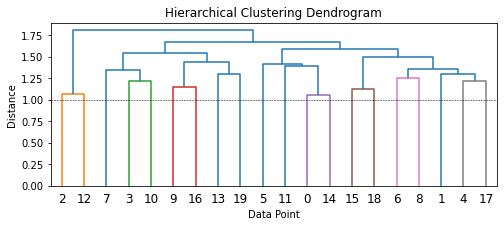

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0,c='k', ls='--', lw=0.5);

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0
cluster_labels = fcluster(Z,max_dist,criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels,columns=['ClusterLabel'])
pd.concat([corpus_df,cluster_labels], axis=1)

,Reviews,ClusterLabel
0,I feel so LUCKY to have found this used (phone...,10
1,"nice phone, nice up grade from my pantach revu...",20
2,Very pleased,1
3,It works good but it goes slow sometimes but i...,3
4,Great phone to replace my lost phone. The only...,18
5,I already had a phone with problems... I know ...,13
6,The charging port was loose. I got that solder...,16
7,"Phone looks good but wouldn't stay charged, ha...",5
8,I originally was using the Samsung S2 Galaxy f...,17
9,It's battery life is great. It's very responsi...,6
